In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


2024-11-07 12:20:29.251839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 12:20:29.270255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 12:20:29.277617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 12:20:29.290514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = '/raid/home/minan/home/project/project/newdataset/train'
test_dir = '/raid/home/minan/home/project/project/newdataset/test'

In [3]:
# Data preprocessing (without augmentation)
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Adjusted for InceptionV3
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),  # Adjusted for InceptionV3
    batch_size=32,
    class_mode='binary'
)

Found 3999 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [4]:
# Load the pretrained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=test_generator)


2024-11-07 12:22:19.577096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 28017 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2024-11-07 12:22:19.582678: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 36755 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2024-11-07 12:22:19.589614: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 26446 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2024-11-07 12:22:19.595122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 28101 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bu

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step
Epoch 1/30


/raid/home/minan/home/project/project/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730962388.083016 3540965 service.cc:146] XLA service 0x7f3438001c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730962388.083054 3540965 service.cc:154]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730962388.083062 3540965 service.cc:154]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730962388.083066 3540965 service.cc:154]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730962388.083070 3540965 se

  1/125 ━━━━━━━━━━━━━━━━━━━━ 37:11 18s/step - accuracy: 0.3750 - loss: 0.8741

I0000 00:00:1730962398.475563 3540965 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 463ms/step - accuracy: 0.5966 - loss: 0.6631 - val_accuracy: 0.7595 - val_loss: 0.5481
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.7304 - loss: 0.5280 - val_accuracy: 0.7595 - val_loss: 0.5316
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 248ms/step - accuracy: 0.7684 - loss: 0.4815 - val_accuracy: 0.7848 - val_loss: 0.5262
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 254ms/step - accuracy: 0.7772 - loss: 0.4646 - val_accuracy: 0.7722 - val_loss: 0.5411
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 275ms/step - accuracy: 0.7958 - loss: 0.4336 - val_accuracy: 0.7215 - val_loss: 0.5293
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - accuracy: 0.8174 - loss: 0.4225 - val_accuracy: 0.7468 - val_loss: 0.5377
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 261ms/step - accuracy: 0.8278 - loss: 0.3984 - val_accuracy: 0.7468 - val_loss: 0.5315
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 256ms/step - accuracy: 0.8393 - loss: 0.3867 - val

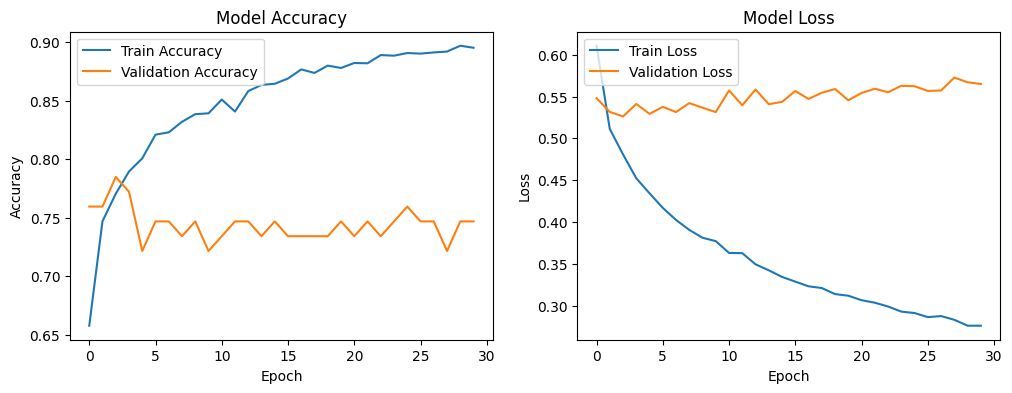

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.7133 - loss: 0.6353
Test Accuracy: 74.68%
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step
Precision: 0.51
Recall: 0.51
F1 Score: 0.51
Confusion Matrix:
[[21 19]
 [19 20]]

Classification Report:
              precision    recall  f1-score   support

        high       0.53      0.53      0.53        40
         low       0.51      0.51      0.51        39

    accuracy                           0.52        79
   macro avg       0.52      0.52      0.52        79
weighted avg       0.52      0.52      0.52        79



In [5]:
# Plotting training & validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test set to calculate precision, recall, F1-score, and confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_true = test_generator.classes  # True labels
y_pred = (model.predict(test_generator) > 0.5).astype(int)  # Predicted labels (binary thresholding)

# Precision, recall, F1-score, and confusion matrix
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

# Classification report for detailed metrics
print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))